<a href="https://colab.research.google.com/github/spjoshi96/Predicting-the-Accurate-mileage-of-vehicle-/blob/main/BusinessAnalytics_with_python3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from os import system

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Credit_data = pd.read_csv("credit.csv",)

In [ ]:
Credit_data.head(20)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [ ]:
Credit_data.shape

(1000, 17)

In [ ]:
Credit_data.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [ ]:
for feature in Credit_data.columns:   # loop through all columns in datafram 
  if Credit_data[feature].dtype == 'object':  # only applied to the columns with categorical strings
    Credit_data[feature] = pd.Categorical(Credit_data[feature])  # Replace string with an integer 


In [ ]:
print(Credit_data.checking_balance.value_counts())
print(Credit_data.credit_history.value_counts())
print(Credit_data.purpose.value_counts())
print(Credit_data.savings_balance.value_counts())
print(Credit_data.employment_duration.value_counts())
print(Credit_data.other_credit.value_counts())
print(Credit_data.housing.value_counts())
print(Credit_data.job.value_counts())
print(Credit_data.phone.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


In [ ]:
replace_struct = {"checking_balance":{"< 0 DM":1,"1 - 200 DM": 2,"> 200 DM": 3, "unknown": -1 }, "credit_history": {"critical": 1,"poor": 2, "good": 3, "very good": 4, "perfect": 5},"savings_balance": {"< 100 DM":1,"100 - 500 DM": 2, "500 - 1000 DM": 3,"> 1000 DM": 4, "unknown": -1},"employment_duration": {"unemployed": 1, "< 1 year": 2, "1 - 4 years": 3,"4 - 7 years": 4, "> 7 years": 5}, "phone": {"no": 1, "yes": 2}, "default":{"no": 0, "yes": 1}  }

onehotcols = ["purpose", "housing", "other_credit", "job"]

In [ ]:
Credit_data = Credit_data.replace(replace_struct)
Credit_data = pd.get_dummies(Credit_data, columns = onehotcols)
Credit_data.head(20)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,default,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,1,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,2,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,2,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,2,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,2,2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0


In [ ]:
Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

In [ ]:
# spliting the data
x = Credit_data.drop("default", axis = 1)
y = Credit_data.pop("default")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 1)

In [ ]:
Dtree = DecisionTreeClassifier(criterion= 'gini', random_state = 1)

In [ ]:
Dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
print(Dtree.score(x_train, y_train))
print(Dtree.score(x_test, y_test))

1.0
0.6933333333333334


In [ ]:
#Regularazation and reducing over fitting 
Dtreer = DecisionTreeClassifier(criterion = 'gini', random_state = 1, max_depth = 3)

In [ ]:
Dtreer.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
print(Dtreer.score(x_train, y_train))
print(Dtreer.score(x_test, y_test))

0.7528571428571429
0.7433333333333333


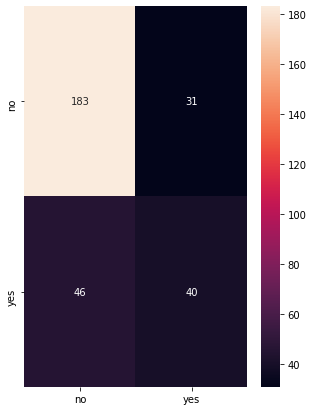

In [ ]:
y_predict = Dtreer.predict(x_test)
Confusion_matrix = metrics.confusion_matrix(y_test, y_predict, labels = [0,1])
df_cm = pd.DataFrame(Confusion_matrix, index =  [i for i in ['no','yes']], columns =[i for i in ['no','yes']] )
plt.figure(figsize = (5,7))
sns.heatmap(df_cm, annot = True, fmt = 'g')

In [ ]:
# Regularization with Bgging 
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators = 40, base_estimator = Dtreer, random_state = 1)
bgcl.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
      

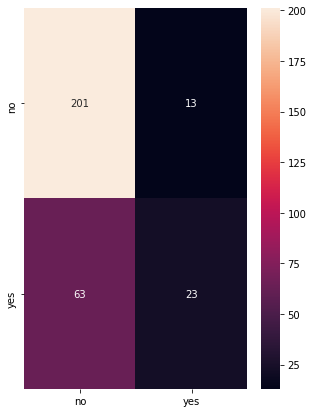

In [ ]:
y_predict = bgcl.predict(x_test)
Confusion_matrix = metrics.confusion_matrix(y_test, y_predict, labels = [0,1])
df_cm = pd.DataFrame(Confusion_matrix, index =  [i for i in ['no','yes']], columns =[i for i in ['no','yes']] )
plt.figure(figsize = (5,7))
sns.heatmap(df_cm, annot = True, fmt = 'g')

In [ ]:
print(bgcl.score(x_train, y_train))
print(bgcl.score(x_test, y_test))

0.7814285714285715
0.7466666666666667


In [ ]:
# Ensemble learning Boosting Techniques - AdaBoost

from sklearn.ensemble import AdaBoostClassifier
adbcl = AdaBoostClassifier(n_estimators = 5, random_state = 1)
adbcl = adbcl.fit(x_train, y_train)


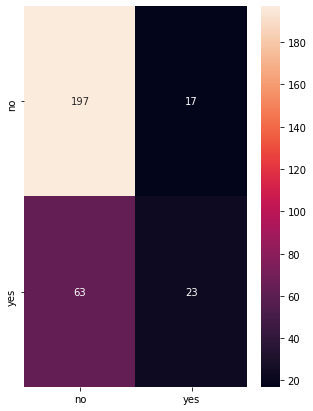

In [ ]:
y_predict = adbcl.predict(x_test)
Confusion_matrix = metrics.confusion_matrix(y_test, y_predict, labels = [0,1])
df_cm = pd.DataFrame(Confusion_matrix, index =  [i for i in ['no','yes']], columns =[i for i in ['no','yes']] )
plt.figure(figsize = (5,7))
sns.heatmap(df_cm, annot = True, fmt = 'g')

In [ ]:
print(adbcl.score(x_train, y_train))
print(adbcl.score(x_test, y_test))

0.7442857142857143
0.7333333333333333


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state = 1, max_features = 12)
rfcl.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

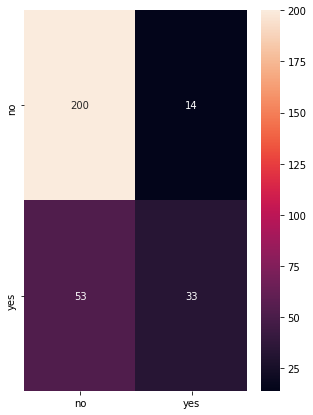

In [ ]:
y_predict = rfcl.predict(x_test)
Confusion_matrix = metrics.confusion_matrix(y_test, y_predict, labels = [0,1])
df_cm = pd.DataFrame(Confusion_matrix, index =  [i for i in ['no','yes']], columns =[i for i in ['no','yes']] )
plt.figure(figsize = (5,7))
sns.heatmap(df_cm, annot = True, fmt = 'g')

In [ ]:
print(rfcl.score(x_train, y_train))
print(rfcl.score(x_test, y_test))

0.9985714285714286
0.7766666666666666
